In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
from mpmath import ellipk,log
from scipy.special import gamma as GAMMA
import os 
#from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from MoreSources import *
from scipy.misc import derivative as scider
import pandas as pd
from scipy.linalg import eigh,eig,eigvalsh
from functools import partial
import seaborn as sns
from FeynmanHellman import *
from saddlefinder import *
import csv
from Decorators import *
from YuanDos import *
TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

In [2]:
thetai = 1.5

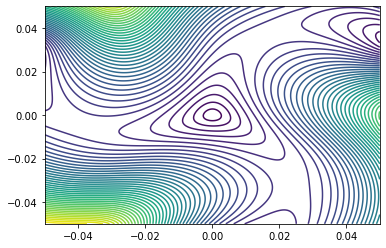

In [3]:
X,Y,Z = data_for_contours(thetai)
plt.contour(X,Y,Z,levels=50)

(array([0.01577442, 0.03716906]), 99, 2)
0.012389243179913172
[-15.95126783  96.15206278]


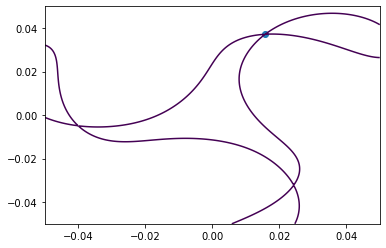

In [7]:
thetai = 1.4
X,Y,Z = data_for_contours(thetai)
#plt.contour(X,Y,Z,levels=50)
xGuess = (0.025,0.025)
sol = find_saddle(xGuess,thetai*IN_RADIAN,verbose = True)
print(sol)
sadx, sady = sol[0]
plt.scatter(sadx,sady)
Ev = generate_spectrum_Twisted_graphene_single_point(vFpar,wpar,thetai*IN_RADIAN,sadx,sady,symmetric = True)[4]
print(Ev)
plt.contour(X,Y,Z, levels = (Ev,))
#kx0,ky0 = rot2D(sol[0],2*np.pi/3)
kx0,ky0 = sol[0]
pdvatfixedky = partial(my_decorator(FHpdvs),  vFpar,  wpar, thetai*IN_RADIAN, ky_fixed = ky0,symmetric = True)
pdvatfixedkx = partial(my_decorator(FHpdvs),  vFpar,  wpar, thetai*IN_RADIAN, kx0,symmetric = True)
b = scider(ret_first_decorator(pdvatfixedkx),ky0,dx=1e-8,n=1)
d = scider(ret_second_decorator(pdvatfixedkx),ky0,dx=1e-8,n=1)
a = scider(ret_first_decorator(pdvatfixedky),kx0,dx=1e-8,n=1)
c = scider(ret_second_decorator(pdvatfixedky),kx0,dx=1e-8,n=1)
HessMat = np.array([[a,b],[c,d]])
EigVals, EigVectors = eig(HessMat)
EigVals = np.real(EigVals)
print(EigVals)

In [5]:
alphabetalist = np.load('alphabeta.npy')
print(alphabetalist)

[[ 1.75956659e+02 -1.42599170e+01]
 [ 1.56467126e+02 -1.02631927e+01]
 [ 1.38331309e+02 -6.48074723e+00]
 [ 1.21933121e+02 -3.18641765e+00]
 [ 1.07886466e+02 -8.32377779e-01]
 [ 9.71561756e+01 -3.29489450e-03]
 [ 8.98725381e+01 -1.13657313e+00]
 [ 8.64832653e+01 -4.06450489e+00]
 [ 8.61631575e+01 -7.86968263e+00]]


In [6]:
sol

(array([0.01577442, 0.03716906]), 99, 2)